Created: 25 August 2023

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import package
---

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,RandomizedSearchCV,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,precision_score,recall_score,f1_score
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pickle

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from xgboost import XGBClassifier

### Loading data
---
- df : merged data

In [293]:
# Loading data
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iDMas DR V2/Validation/dataset/snubh_training_data/DR_SNUBH_E2201_400.csv')
df
print(df.describe())
df.head()

              Age      Height      Weight      DM_dur         SBP         DBP  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean    61.907500  163.518250   66.559000   12.622500  136.720000   78.315000   
std     10.283156    8.922877   12.446743    7.587418   15.463324   12.261797   
min     26.000000  139.200000   40.400000    0.000000   80.000000   47.000000   
25%     56.000000  156.575000   57.550000    7.000000  126.750000   71.750000   
50%     63.000000  163.600000   65.100000   11.000000  137.000000   78.000000   
75%     70.000000  170.300000   73.500000   17.000000  148.000000   85.000000   
max     89.000000  188.800000  118.300000   49.000000  186.000000  181.000000   

               TC     Glucose       HbA1c        eGFR  Cystatin_C     BMI_cal  \
count  400.000000  400.000000  400.000000  400.000000   400.00000  400.000000   
mean   153.975000  140.235000    7.504750   87.888750     0.84190   24.762750   
std     34.651496   36.9952

,Screening_No,Age,Height,Weight,DM_dur,SBP,DBP,TC,Glucose,HbA1c,eGFR,Cystatin_C,BMI_cal,Sex,DM_insul,Smoke_Hx,DR_diagnosis_status,Adjusted_diagnosis,Adjusted_diagnosis2,DR_stage
0,D-001,66,157.8,70.7,5.0,130,84,203,171,7.5,84.1,1.02,28.39,1,0,0.0,0.0,0,0.0,0.0
1,D-002,51,171.9,65.1,5.0,140,85,206,130,6.0,98.5,0.93,22.03,1,0,1.0,0.0,0,0.0,0.0
2,D-003,46,174.6,60.1,7.0,122,75,203,242,11.2,104.5,0.65,19.71,1,0,1.0,1.0,1,1.0,2.0
3,D-004,60,169.7,62.7,22.0,117,69,154,117,7.9,91.3,0.73,21.77,1,0,0.5,0.0,0,0.0,0.0
4,D-005,45,160.0,73.5,25.0,144,85,218,134,7.5,109.2,0.59,28.71,2,0,0.0,0.0,0,0.0,0.0


In [294]:
df.columns

Index(['Screening_No', 'Age', 'Height', 'Weight', 'DM_dur', 'SBP', 'DBP', 'TC',
       'Glucose', 'HbA1c', 'eGFR', 'Cystatin_C', 'BMI_cal', 'Sex', 'DM_insul',
       'Smoke_Hx', 'DR_diagnosis_status', 'Adjusted_diagnosis',
       'Adjusted_diagnosis2', 'DR_stage'],
      dtype='object')

In [295]:
df.isna().sum()

Screening_No            0
Age                     0
Height                  0
Weight                  0
DM_dur                  0
SBP                     0
DBP                     0
TC                      0
Glucose                 0
HbA1c                   0
eGFR                    0
Cystatin_C              0
BMI_cal                 0
Sex                     0
DM_insul                0
Smoke_Hx                0
DR_diagnosis_status     0
Adjusted_diagnosis      0
Adjusted_diagnosis2    49
DR_stage                0
dtype: int64

In [296]:
df['Adjusted_diagnosis'].value_counts()

0    341
1     59
Name: Adjusted_diagnosis, dtype: int64

In [297]:
# idmas_df = df[['Age', 'Sex', 'Height', 'Weight', 'SBP', 'DBP', 'BMI_cal', 'Glucose', 'DM_dur', 'DM_insul', 'TC', 'HbA1c', 'eGFR', 'Cystatin_C', 'Smoke_Hx', 'DR_diagnosis_status']]

idmas_df = df[['Screening_No','Age', 'Sex', 'Height', 'Weight', 'SBP', 'DBP', 'DM_dur', 'DM_insul','Smoke_Hx', 'TC','Glucose', 'HbA1c', 'eGFR', 'Cystatin_C', 'BMI_cal','Adjusted_diagnosis','Adjusted_diagnosis2']]

In [298]:
idmas_df.rename(columns={'Adjusted_diagnosis2': 'Adjusted_diagnosis2(old)'}, inplace=True)
idmas_df.rename(columns={'Adjusted_diagnosis': 'Adjusted_diagnosis2'}, inplace=True)

<ipython-input-298-bca4750c3098>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idmas_df.rename(columns={'Adjusted_diagnosis2': 'Adjusted_diagnosis2(old)'}, inplace=True)
<ipython-input-298-bca4750c3098>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idmas_df.rename(columns={'Adjusted_diagnosis': 'Adjusted_diagnosis2'}, inplace=True)


In [299]:
new_idmas_df = idmas_df

In [300]:
new_idmas_df.isna().sum()

Screening_No                 0
Age                          0
Sex                          0
Height                       0
Weight                       0
SBP                          0
DBP                          0
DM_dur                       0
DM_insul                     0
Smoke_Hx                     0
TC                           0
Glucose                      0
HbA1c                        0
eGFR                         0
Cystatin_C                   0
BMI_cal                      0
Adjusted_diagnosis2          0
Adjusted_diagnosis2(old)    49
dtype: int64

In [301]:
# Assuming df is your DataFrame
# Replace 'your_categorical_column' and 'your_condition' with the actual column name and condition

# Example condition: Select rows where 'your_categorical_column' is equal to 'your_condition'

# Select 90 rows based on the condition
selected_rows = new_idmas_df[new_idmas_df['Adjusted_diagnosis2'] == 0].head(150)

# If you want to shuffle the selected rows
selected_rows = selected_rows.sample(frac=1, random_state=42).reset_index(drop=True)

In [302]:
# Assuming df is your DataFrame
# Replace 'your_categorical_column' and 'your_condition' with the actual column name and condition

# Example condition: Select rows where 'your_categorical_column' is equal to 'your_condition'
# Select 90 rows based on the condition
selected_rows_1 = new_idmas_df[new_idmas_df['Adjusted_diagnosis2'] == 1]

# If you want to shuffle the selected rows
selected_rows_1 = selected_rows_1.sample(frac=1, random_state=42).reset_index(drop=True)

In [303]:
# Concatenate along rows (vertically)
data_balanced = pd.concat([selected_rows, selected_rows_1], axis=0)

In [304]:
data_balanced['Adjusted_diagnosis2'].value_counts()

0    150
1     59
Name: Adjusted_diagnosis2, dtype: int64

In [305]:
training_disease_sample = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iDMas DR V2/Validation/dataset/validation_snubh_january/DR_SNUBH_E2311_case_only_300.csv')
# Drop rows with NaN values
# training_disease_sample.dropna(inplace=True)

In [306]:
training_disease_sample.isna().sum()

Screening_No            0
Sample_ID               0
Age                     0
Height                  1
Weight                  0
BMI_cal                 1
DM_dur                  0
SBP                    36
DBP                    38
TC                     26
Glucose                25
HbA1c                  15
eGFR                   30
Sex                     0
Smoke_Hx                0
DM_insul                0
Adjusted_diagnosis2     0
DR_stage                0
Cystatin_C              0
dtype: int64

In [307]:
import pandas as pd
from sklearn.impute import KNNImputer

# training_disease_sample['DBP'].value_counts()

# Extract features (X) and target variable (y)
X = training_disease_sample.drop(['Screening_No', 'Sample_ID','Age', 'Weight', 'DM_dur', 'Sex', 'Smoke_Hx', 'DM_insul','Adjusted_diagnosis2','DR_stage', 'Cystatin_C'], axis=1)  # Exclude non-numeric columns
# y = your_data['Screening_No']

# Initialize KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Perform imputation
X_imputed = knn_imputer.fit_transform(X)

# Convert the imputed array back to a DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Replace the original features with the imputed ones in the original DataFrame
training_disease_sample = pd.concat([training_disease_sample[['Screening_No', 'Sample_ID','Age', 'Weight', 'DM_dur', 'Sex', 'Smoke_Hx', 'DM_insul','Adjusted_diagnosis2','DR_stage', 'Cystatin_C']], X_imputed_df], axis=1)

# Check for missing values after imputation
missing_values_after_imputation = training_disease_sample.isnull().sum()
print("Missing Values After Imputation:")
print(missing_values_after_imputation)

# Now, 'your_data_imputed' contains the dataset with missing values imputed using KNN

Missing Values After Imputation:
Screening_No           0
Sample_ID              0
Age                    0
Weight                 0
DM_dur                 0
Sex                    0
Smoke_Hx               0
DM_insul               0
Adjusted_diagnosis2    0
DR_stage               0
Cystatin_C             0
Height                 0
BMI_cal                0
SBP                    0
DBP                    0
TC                     0
Glucose                0
HbA1c                  0
eGFR                   0
dtype: int64


In [308]:
training_disease_sample.isna().sum()

Screening_No           0
Sample_ID              0
Age                    0
Weight                 0
DM_dur                 0
Sex                    0
Smoke_Hx               0
DM_insul               0
Adjusted_diagnosis2    0
DR_stage               0
Cystatin_C             0
Height                 0
BMI_cal                0
SBP                    0
DBP                    0
TC                     0
Glucose                0
HbA1c                  0
eGFR                   0
dtype: int64

#Outlier treatment

In [309]:
# numerical

col_num = ['DM_dur','SBP','TC','Glucose','HbA1c','eGFR','Cystatin_C']

len(col_num)

7

In [310]:
#columns_with_outliers = set(continuous_vars).difference({'age','HE_wc', 'HE_wt',''DE1_dur'})
#columns_with_outliers = list(columns_with_outliers)
columns_with_outliers = ['DM_dur','SBP','TC','Glucose','HbA1c','eGFR','Cystatin_C']
print(columns_with_outliers)

training_disease_sample.loc[training_disease_sample['DM_dur']>1000,['Screening_No','DM_dur']]

['DM_dur', 'SBP', 'TC', 'Glucose', 'HbA1c', 'eGFR', 'Cystatin_C']


,Screening_No,DM_dur


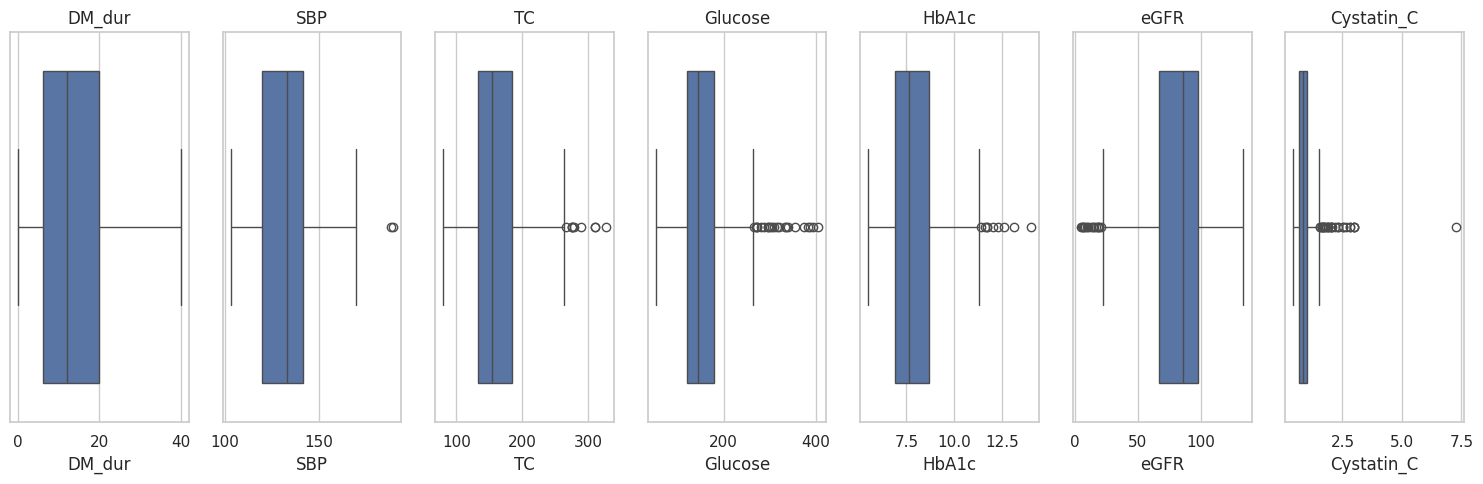

In [311]:
# Set the style for seaborn (optional)
sns.set(style="whitegrid")

# Define the columns with outliers
columns_with_outliers = ['DM_dur', 'SBP', 'TC', 'Glucose', 'HbA1c', 'eGFR', 'Cystatin_C']

# Create subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=len(columns_with_outliers), figsize=(15, 5))

# Draw boxplots for each column
for i, column in enumerate(columns_with_outliers):
    sns.boxplot(x=training_disease_sample[column], ax=axes[i])
    axes[i].set_title(column)

# Show the plot
plt.tight_layout()
plt.show()

In [312]:
columns_with_outliers = ['DM_dur', 'SBP', 'TC', 'Glucose', 'HbA1c', 'eGFR', 'Cystatin_C']
treating_outliers = []  # array

# Choose the feature you want to treat outliers for
col_to_treat = 'DM_dur'

print(col_to_treat)
tenth_percentile = np.percentile(training_disease_sample[col_to_treat], 1.0)  # return 1st percentile
ninetieth_percentile = np.percentile(training_disease_sample[col_to_treat], 99.0)  # return 99th percentile
print("lower percentile:", tenth_percentile, "upper percentile:", ninetieth_percentile)
b = np.where(training_disease_sample[col_to_treat] < tenth_percentile, tenth_percentile,
            training_disease_sample[col_to_treat])
idx_low = np.where(training_disease_sample[col_to_treat] < tenth_percentile)[0]
print(len(idx_low))
b = np.where(b > ninetieth_percentile, ninetieth_percentile, b)
idx_upp = np.where(training_disease_sample[col_to_treat] > ninetieth_percentile)[0]
print(len(idx_upp))
print(len(b))  # same length as df[col]
treating_outliers.append(b)

# Create DataFrame
Xmat_0 = pd.DataFrame(np.array(treating_outliers).T, columns=[col_to_treat])

DM_dur
lower percentile: 0.0 upper percentile: 40.0
0
0
300


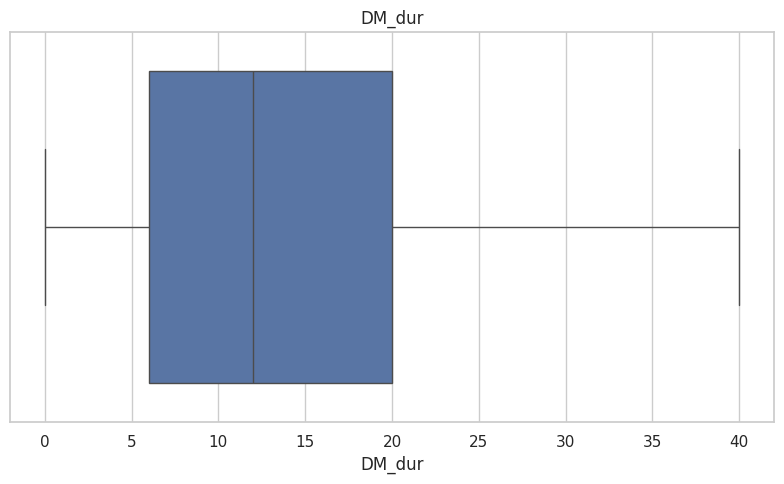

In [313]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn (optional)
sns.set(style="whitegrid")

# Choose the feature to create boxplot
feature_to_plot = 'DM_dur'

# Create subplots for the chosen feature
fig, ax = plt.subplots(figsize=(8, 5))

# Draw boxplot for the chosen feature
sns.boxplot(x=Xmat_0[feature_to_plot], ax=ax)
ax.set_title(feature_to_plot)

# Show the plot
plt.tight_layout()
plt.show()


In [314]:
columns_with_outliers = ['DM_dur', 'SBP', 'TC', 'Glucose', 'HbA1c', 'eGFR', 'Cystatin_C']
treating_outliers = []  # array

# Choose the feature you want to treat outliers for
col_to_treat = 'SBP'

print(col_to_treat)
tenth_percentile = np.percentile(training_disease_sample[col_to_treat], 1.0)  # return 1st percentile
ninetieth_percentile = np.percentile(training_disease_sample[col_to_treat], 99.0)  # return 99th percentile
print("lower percentile:", tenth_percentile, "upper percentile:", ninetieth_percentile)
b = np.where(training_disease_sample[col_to_treat] < tenth_percentile, tenth_percentile,
            training_disease_sample[col_to_treat])
idx_low = np.where(training_disease_sample[col_to_treat] < tenth_percentile)[0]
print(len(idx_low))
b = np.where(b > ninetieth_percentile, ninetieth_percentile, b)
idx_upp = np.where(training_disease_sample[col_to_treat] > ninetieth_percentile)[0]
print(len(idx_upp))
print(len(b))  # same length as df[col]
treating_outliers.append(b)

# Create DataFrame
Xmat = pd.DataFrame(np.array(treating_outliers).T, columns=[col_to_treat])

SBP
lower percentile: 107.0 upper percentile: 168.01999999999998
2
3
300


In [315]:
training_disease_sample[['SBP']].describe()

,SBP
count,300.000000
mean,133.438995
std,13.917833
min,103.000000
25%,120.000000
50%,132.900000
75%,141.600000
max,190.000000


In [316]:
Xmat.describe()

,SBP
count,300.000000
mean,133.309195
std,13.381519
min,107.000000
25%,120.000000
50%,132.900000
75%,141.600000
max,168.020000


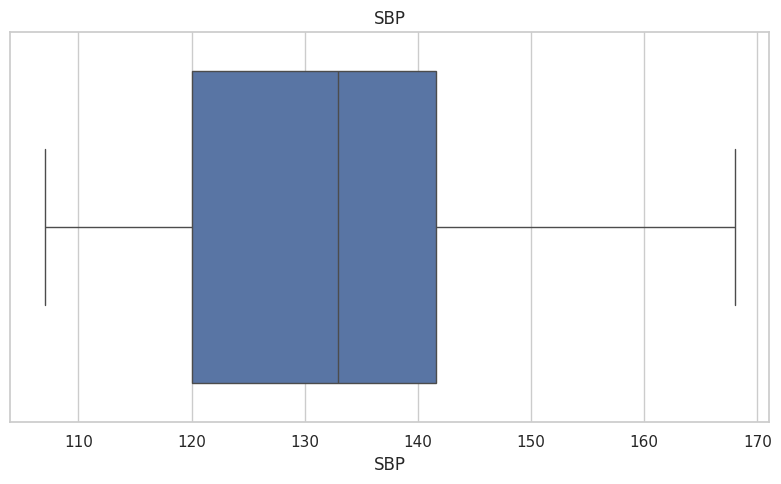

In [317]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn (optional)
sns.set(style="whitegrid")

# Choose the feature to create boxplot
feature_to_plot = 'SBP'

# Create subplots for the chosen feature
fig, ax = plt.subplots(figsize=(8, 5))

# Draw boxplot for the chosen feature
sns.boxplot(x=Xmat[feature_to_plot], ax=ax)
ax.set_title(feature_to_plot)

# Show the plot
plt.tight_layout()
plt.show()


In [318]:
columns_with_outliers = ['DM_dur', 'SBP', 'TC', 'Glucose', 'HbA1c', 'eGFR', 'Cystatin_C']
treating_outliers = []  # array

# Choose the feature you want to treat outliers for
col_to_treat = 'TC'

print(col_to_treat)
tenth_percentile = np.percentile(training_disease_sample[col_to_treat], 1.0)  # return 1st percentile
ninetieth_percentile = np.percentile(training_disease_sample[col_to_treat], 97.0)  # return 99th percentile
print("lower percentile:", tenth_percentile, "upper percentile:", ninetieth_percentile)
b = np.where(training_disease_sample[col_to_treat] < tenth_percentile, tenth_percentile,
            training_disease_sample[col_to_treat])
idx_low = np.where(training_disease_sample[col_to_treat] < tenth_percentile)[0]
print(len(idx_low))
b = np.where(b > ninetieth_percentile, ninetieth_percentile, b)
idx_upp = np.where(training_disease_sample[col_to_treat] > ninetieth_percentile)[0]
print(len(idx_upp))
print(len(b))  # same length as df[col]
treating_outliers.append(b)

# Create DataFrame
Xmat_1 = pd.DataFrame(np.array(treating_outliers).T, columns=[col_to_treat])

TC
lower percentile: 88.97 upper percentile: 263.0899999999999
3
9
300


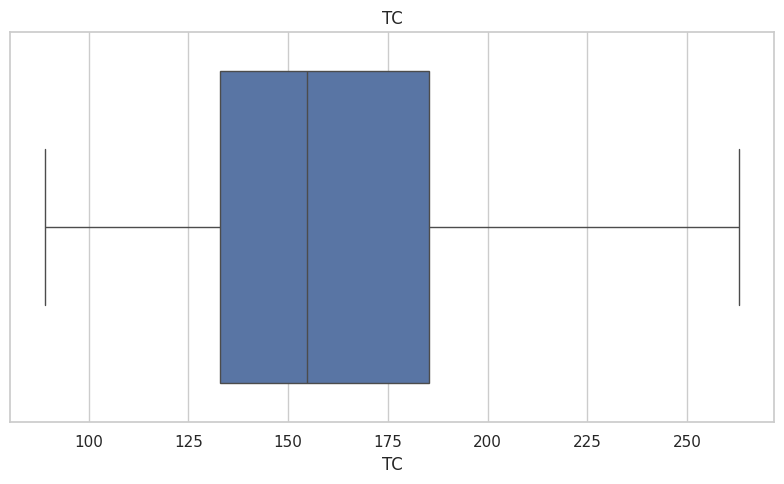

In [319]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn (optional)
sns.set(style="whitegrid")

# Choose the feature to create boxplot
feature_to_plot = 'TC'

# Create subplots for the chosen feature
fig, ax = plt.subplots(figsize=(8, 5))

# Draw boxplot for the chosen feature
sns.boxplot(x=Xmat_1[feature_to_plot], ax=ax)
ax.set_title(feature_to_plot)

# Show the plot
plt.tight_layout()
plt.show()


In [320]:
columns_with_outliers = ['DM_dur', 'SBP', 'TC', 'Glucose', 'HbA1c', 'eGFR', 'Cystatin_C']
treating_outliers = []  # array

# Choose the feature you want to treat outliers for
col_to_treat = 'Glucose'

print(col_to_treat)
tenth_percentile = np.percentile(training_disease_sample[col_to_treat], 1.0)  # return 1st percentile
ninetieth_percentile = np.percentile(training_disease_sample[col_to_treat], 92.5)  # return 99th percentile
print("lower percentile:", tenth_percentile, "upper percentile:", ninetieth_percentile)
b = np.where(training_disease_sample[col_to_treat] < tenth_percentile, tenth_percentile,
            training_disease_sample[col_to_treat])
idx_low = np.where(training_disease_sample[col_to_treat] < tenth_percentile)[0]
print(len(idx_low))
b = np.where(b > ninetieth_percentile, ninetieth_percentile, b)
idx_upp = np.where(training_disease_sample[col_to_treat] > ninetieth_percentile)[0]
print(len(idx_upp))
print(len(b))  # same length as df[col]
treating_outliers.append(b)

# Create DataFrame
Xmat_2 = pd.DataFrame(np.array(treating_outliers).T, columns=[col_to_treat])

Glucose
lower percentile: 66.99 upper percentile: 261.44999999999993
3
23
300


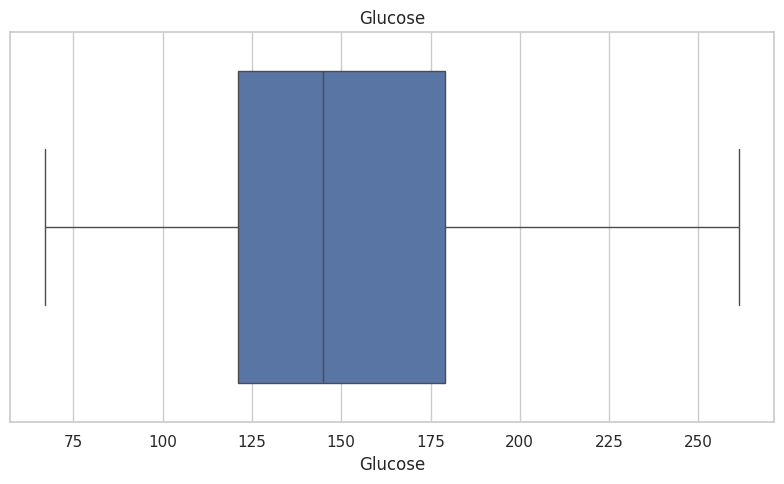

In [321]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn (optional)
sns.set(style="whitegrid")

# Choose the feature to create boxplot
feature_to_plot = 'Glucose'

# Create subplots for the chosen feature
fig, ax = plt.subplots(figsize=(8, 5))

# Draw boxplot for the chosen feature
sns.boxplot(x=Xmat_2[feature_to_plot], ax=ax)
ax.set_title(feature_to_plot)

# Show the plot
plt.tight_layout()
plt.show()


In [322]:
columns_with_outliers = ['DM_dur', 'SBP', 'TC', 'Glucose', 'HbA1c', 'eGFR', 'Cystatin_C']
treating_outliers = []  # array

# Choose the feature you want to treat outliers for
col_to_treat = 'HbA1c'

print(col_to_treat)
tenth_percentile = np.percentile(training_disease_sample[col_to_treat], 1.0)  # return 1st percentile
ninetieth_percentile = np.percentile(training_disease_sample[col_to_treat], 97.0)  # return 99th percentile
print("lower percentile:", tenth_percentile, "upper percentile:", ninetieth_percentile)
b = np.where(training_disease_sample[col_to_treat] < tenth_percentile, tenth_percentile,
            training_disease_sample[col_to_treat])
idx_low = np.where(training_disease_sample[col_to_treat] < tenth_percentile)[0]
print(len(idx_low))
b = np.where(b > ninetieth_percentile, ninetieth_percentile, b)
idx_upp = np.where(training_disease_sample[col_to_treat] > ninetieth_percentile)[0]
print(len(idx_upp))
print(len(b))  # same length as df[col]
treating_outliers.append(b)

# Create DataFrame
Xmat_3 = pd.DataFrame(np.array(treating_outliers).T, columns=[col_to_treat])

HbA1c
lower percentile: 5.5 upper percentile: 11.302999999999997
0
9
300


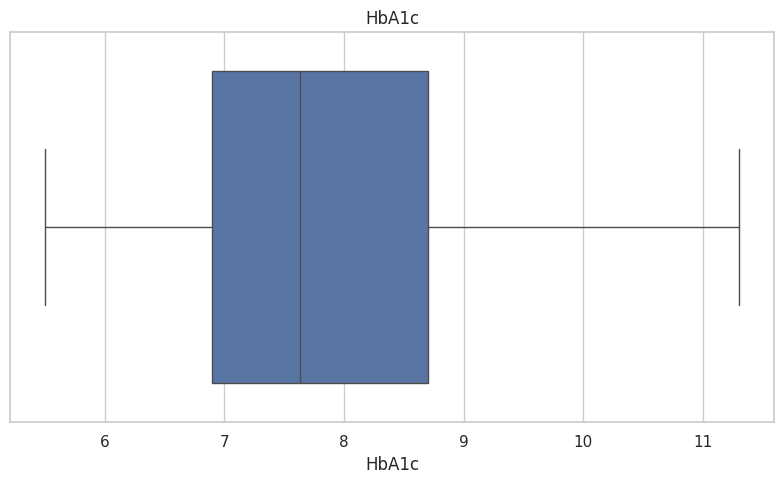

In [323]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn (optional)
sns.set(style="whitegrid")

# Choose the feature to create boxplot
feature_to_plot = 'HbA1c'

# Create subplots for the chosen feature
fig, ax = plt.subplots(figsize=(8, 5))

# Draw boxplot for the chosen feature
sns.boxplot(x=Xmat_3[feature_to_plot], ax=ax)
ax.set_title(feature_to_plot)

# Show the plot
plt.tight_layout()
plt.show()


In [324]:
columns_with_outliers = ['DM_dur', 'SBP', 'TC', 'Glucose', 'HbA1c', 'eGFR', 'Cystatin_C']
treating_outliers = []  # array

# Choose the feature you want to treat outliers for
col_to_treat = 'eGFR'

print(col_to_treat)
tenth_percentile = np.percentile(training_disease_sample[col_to_treat], 5.0)  # return 1st percentile
ninetieth_percentile = np.percentile(training_disease_sample[col_to_treat], 100.0)  # return 99th percentile
print("lower percentile:", tenth_percentile, "upper percentile:", ninetieth_percentile)
b = np.where(training_disease_sample[col_to_treat] < tenth_percentile, tenth_percentile,
            training_disease_sample[col_to_treat])
idx_low = np.where(training_disease_sample[col_to_treat] < tenth_percentile)[0]
print(len(idx_low))
b = np.where(b > ninetieth_percentile, ninetieth_percentile, b)
idx_upp = np.where(training_disease_sample[col_to_treat] > ninetieth_percentile)[0]
print(len(idx_upp))
print(len(b))  # same length as df[col]
treating_outliers.append(b)

# Create DataFrame
Xmat_4 = pd.DataFrame(np.array(treating_outliers).T, columns=[col_to_treat])

eGFR
lower percentile: 21.720000000000002 upper percentile: 134.1
15
0
300


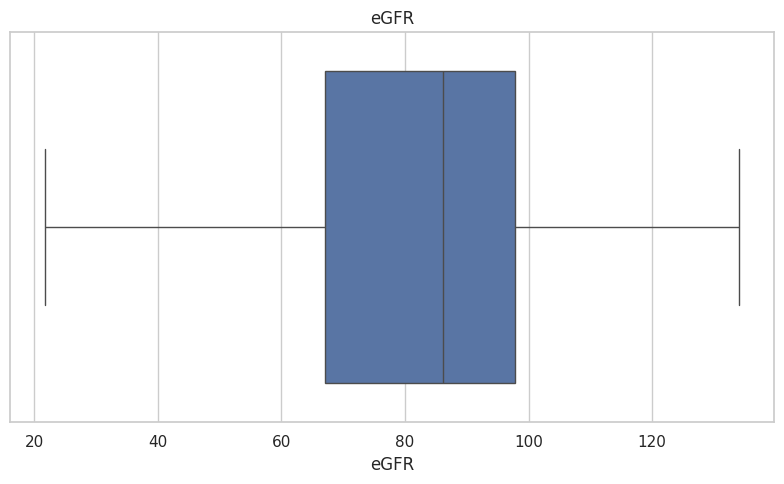

In [325]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn (optional)
sns.set(style="whitegrid")

# Choose the feature to create boxplot
feature_to_plot = 'eGFR'

# Create subplots for the chosen feature
fig, ax = plt.subplots(figsize=(8, 5))

# Draw boxplot for the chosen feature
sns.boxplot(x=Xmat_4[feature_to_plot], ax=ax)
ax.set_title(feature_to_plot)

# Show the plot
plt.tight_layout()
plt.show()


In [326]:
columns_with_outliers = ['DM_dur', 'SBP', 'TC', 'Glucose', 'HbA1c', 'eGFR', 'Cystatin_C']
treating_outliers = []  # array

# Choose the feature you want to treat outliers for
col_to_treat = 'Cystatin_C'

print(col_to_treat)
tenth_percentile = np.percentile(training_disease_sample[col_to_treat], 1.0)  # return 1st percentile
ninetieth_percentile = np.percentile(training_disease_sample[col_to_treat], 95.0)  # return 99th percentile
print("lower percentile:", tenth_percentile, "upper percentile:", ninetieth_percentile)
b = np.where(training_disease_sample[col_to_treat] < tenth_percentile, tenth_percentile,
            training_disease_sample[col_to_treat])
idx_low = np.where(training_disease_sample[col_to_treat] < tenth_percentile)[0]
print(len(idx_low))
b = np.where(b > ninetieth_percentile, ninetieth_percentile, b)
idx_upp = np.where(training_disease_sample[col_to_treat] > ninetieth_percentile)[0]
print(len(idx_upp))
print(len(b))  # same length as df[col]
treating_outliers.append(b)

# Create DataFrame
Xmat_5 = pd.DataFrame(np.array(treating_outliers).T, columns=[col_to_treat])

Cystatin_C
lower percentile: 0.4499 upper percentile: 2.01
3
14
300


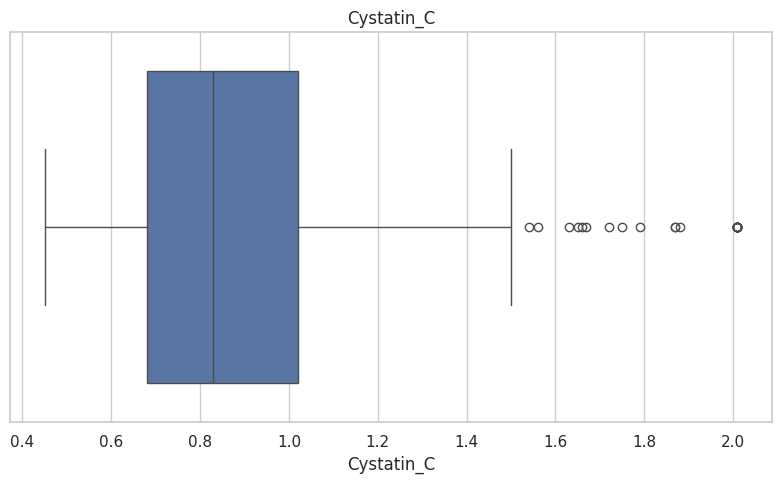

In [327]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn (optional)
sns.set(style="whitegrid")

# Choose the feature to create boxplot
feature_to_plot = 'Cystatin_C'

# Create subplots for the chosen feature
fig, ax = plt.subplots(figsize=(8, 5))

# Draw boxplot for the chosen feature
sns.boxplot(x=Xmat_5[feature_to_plot], ax=ax)
ax.set_title(feature_to_plot)

# Show the plot
plt.tight_layout()
plt.show()


In [328]:
treated_outliers_variables = pd.concat([Xmat_0, Xmat, Xmat_1, Xmat_2, Xmat_3, Xmat_4, Xmat_5], axis=1)

In [329]:
treated_outliers_variables.describe()

,DM_dur,SBP,TC,Glucose,HbA1c,eGFR,Cystatin_C
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,13.773333,133.309195,162.438600,154.513006,7.845364,80.126833,0.930399
std,9.568026,13.381519,42.212142,49.107361,1.397910,26.208061,0.370364
min,0.000000,107.000000,88.970000,66.990000,5.500000,21.720000,0.449900
25%,6.000000,120.000000,133.000000,121.000000,6.900000,67.000000,0.680000
50%,12.000000,132.900000,154.800000,145.000000,7.630000,86.200000,0.830000
75%,20.000000,141.600000,185.250000,179.000000,8.700000,97.800000,1.020000
max,40.000000,168.020000,263.090000,261.450000,11.303000,134.100000,2.010000


In [330]:
training_disease_sample_outliers = training_disease_sample[['DM_dur','SBP', 'TC', 'Glucose', 'HbA1c', 'eGFR', 'Cystatin_C']]

In [341]:
training_disease_sample[['DM_dur','SBP', 'TC', 'Glucose', 'HbA1c', 'eGFR', 'Cystatin_C']].describe()

,DM_dur,SBP,TC,Glucose,HbA1c,eGFR,Cystatin_C
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,13.773333,133.309195,162.438600,154.513006,7.845364,80.126833,0.930399
std,9.568026,13.381519,42.212142,49.107361,1.397910,26.208061,0.370364
min,0.000000,107.000000,88.970000,66.990000,5.500000,21.720000,0.449900
25%,6.000000,120.000000,133.000000,121.000000,6.900000,67.000000,0.680000
50%,12.000000,132.900000,154.800000,145.000000,7.630000,86.200000,0.830000
75%,20.000000,141.600000,185.250000,179.000000,8.700000,97.800000,1.020000
max,40.000000,168.020000,263.090000,261.450000,11.303000,134.100000,2.010000


In [332]:
training_disease_sample_outliers.describe()

,DM_dur,SBP,TC,Glucose,HbA1c,eGFR,Cystatin_C
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,13.773333,133.438995,163.176200,158.955273,7.874274,79.655500,0.971133
std,9.568026,13.917833,44.563114,61.546923,1.483572,27.344384,0.578324
min,0.000000,103.000000,80.000000,52.000000,5.500000,4.400000,0.430000
25%,6.000000,120.000000,133.000000,121.000000,6.900000,67.000000,0.680000
50%,12.000000,132.900000,154.800000,145.000000,7.630000,86.200000,0.830000
75%,20.000000,141.600000,185.250000,179.000000,8.700000,97.800000,1.020000
max,40.000000,190.000000,327.000000,406.000000,14.000000,134.100000,7.270000


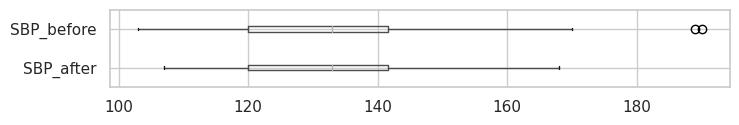

In [333]:
# dataframe
dH = pd.DataFrame({'SBP_after':treated_outliers_variables['SBP'],
                   'SBP_before':training_disease_sample_outliers['SBP']})

# horizontal box plot
fig = plt.figure(figsize =(8, 1))
dH.boxplot(vert=False)
plt.show()

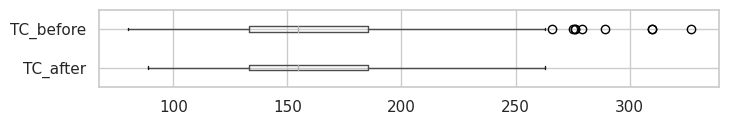

In [334]:
# dataframe
dH = pd.DataFrame({'TC_after':treated_outliers_variables['TC'],
                   'TC_before':training_disease_sample_outliers['TC']})

# horizontal box plot
fig = plt.figure(figsize =(8, 1))
dH.boxplot(vert=False)
plt.show()

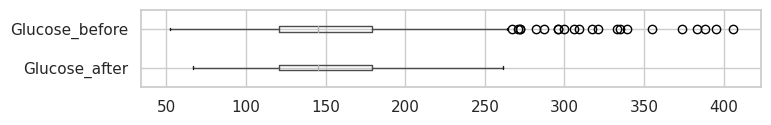

In [335]:
# dataframe
dH = pd.DataFrame({'Glucose_after':treated_outliers_variables['Glucose'],
                   'Glucose_before':training_disease_sample_outliers['Glucose']})

# horizontal box plot
fig = plt.figure(figsize =(8, 1))
dH.boxplot(vert=False)
plt.show()

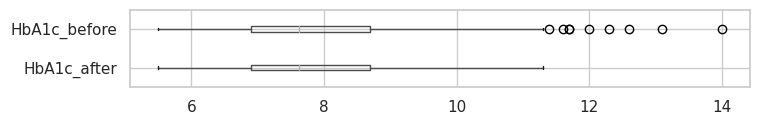

In [336]:
# dataframe
dH = pd.DataFrame({'HbA1c_after':treated_outliers_variables['HbA1c'],
                   'HbA1c_before':training_disease_sample_outliers['HbA1c']})

# horizontal box plot
fig = plt.figure(figsize =(8, 1))
dH.boxplot(vert=False)
plt.show()

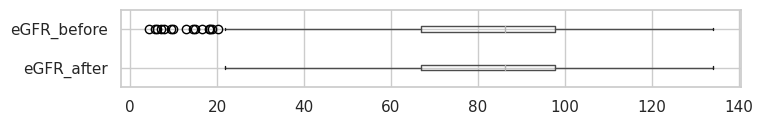

In [337]:
# dataframe
dH = pd.DataFrame({'eGFR_after':treated_outliers_variables['eGFR'],
                   'eGFR_before':training_disease_sample_outliers['eGFR']})

# horizontal box plot
fig = plt.figure(figsize =(8, 1))
dH.boxplot(vert=False)
plt.show()

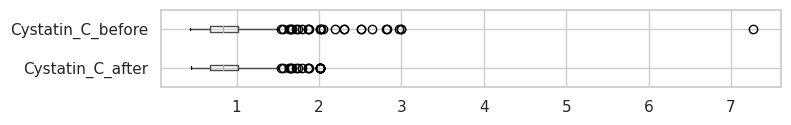

In [338]:
# dataframe
dH = pd.DataFrame({'Cystatin_C_after':treated_outliers_variables['Cystatin_C'],
                   'Cystatin_C_before':training_disease_sample_outliers['Cystatin_C']})

# horizontal box plot
fig = plt.figure(figsize =(8, 1))
dH.boxplot(vert=False)
plt.show()

In [339]:
training_disease_sample[columns_with_outliers] = treated_outliers_variables

In [340]:
training_disease_sample.shape

(300, 19)

In [342]:
# Randomly select 239 rows with all columns
random_selection_disease_1 = training_disease_sample.sample(n=239)
random_selection_disease_2 = training_disease_sample.sample(n=239)
random_selection_disease_3 = training_disease_sample.sample(n=239)

In [343]:
training_disease_sample['Screening_No'].shape

(300,)

In [344]:
# Identify the Screening_No values in training_disease_sample that are not in random_selection_disease_1
not_in_random_selection_1 = training_disease_sample[~training_disease_sample['Screening_No'].isin(random_selection_disease_1['Screening_No'])]
not_in_random_selection_1['Adjusted_diagnosis2'].value_counts()

not_in_random_selection_2 = training_disease_sample[~training_disease_sample['Screening_No'].isin(random_selection_disease_2['Screening_No'])]
not_in_random_selection_2['Adjusted_diagnosis2'].value_counts()

not_in_random_selection_3 = training_disease_sample[~training_disease_sample['Screening_No'].isin(random_selection_disease_3['Screening_No'])]
not_in_random_selection_3['Adjusted_diagnosis2'].value_counts()

1.0    61
Name: Adjusted_diagnosis2, dtype: int64

In [345]:
not_in_random_selection_1['Screening_No']

0      E-001
1      E-002
3      E-004
5      E-006
8      E-009
       ...  
272    E-273
277    E-278
278    E-279
281    E-282
283    E-284
Name: Screening_No, Length: 61, dtype: object

In [346]:
not_in_random_selection_1.shape

(61, 19)

In [347]:
# Training set
# Concatenate along rows (vertically)

data_balanced_1 = pd.concat([data_balanced, not_in_random_selection_1], axis=0)

data_balanced_2 = pd.concat([data_balanced, not_in_random_selection_2], axis=0)

data_balanced_3 = pd.concat([data_balanced, not_in_random_selection_2], axis=0)

In [348]:
data_balanced.shape

(209, 18)

In [349]:
not_in_random_selection_1['Adjusted_diagnosis2'].value_counts()

1.0    61
Name: Adjusted_diagnosis2, dtype: int64

In [350]:
data_balanced_1['Adjusted_diagnosis2'].value_counts()

0.0    150
1.0    120
Name: Adjusted_diagnosis2, dtype: int64

In [352]:
data_balanced_1.to_csv('training_set_outlier_treated_1.csv')
data_balanced_2.to_csv('training_set_outlier_treated_2.csv')
data_balanced_3.to_csv('training_set_outlier_treated_3.csv')

In [36]:
new_idmas_df['Adjusted_diagnosis2'].value_counts()

0    341
1     59
Name: Adjusted_diagnosis2, dtype: int64

In [353]:
validation_control_set_1 = new_idmas_df[~new_idmas_df['Screening_No'].isin(data_balanced['Screening_No'])]

In [354]:
validation_control_set_1['Adjusted_diagnosis2'].value_counts()

0    191
Name: Adjusted_diagnosis2, dtype: int64

In [355]:
# Randomly select 148 rows with all columns
random_selection_1 = validation_control_set_1.sample(n=148)
random_selection_2 = validation_control_set_1.sample(n=148)
random_selection_3 = validation_control_set_1.sample(n=148)

In [356]:
random_selection_1.to_csv('validation_control_set_1.csv')
random_selection_2.to_csv('validation_control_set_2.csv')
random_selection_3.to_csv('validation_control_set_3.csv')

In [366]:
data_balanced_1.columns

Index(['Screening_No', 'Age', 'Sex', 'Height', 'Weight', 'SBP', 'DBP',
       'DM_dur', 'DM_insul', 'Smoke_Hx', 'TC', 'Glucose', 'HbA1c', 'eGFR',
       'Cystatin_C', 'BMI_cal', 'Adjusted_diagnosis2',
       'Adjusted_diagnosis2(old)', 'Sample_ID', 'DR_stage'],
      dtype='object')

In [358]:
data_balanced.to_csv('training_disease.csv')

In [ ]:
# # Rename columns
# new_column_names = {'Sex': 'Gender', 'DM_dur': 'Dm_diagnosed_age', 'DM_insul': 'Dm_insulin_use', 'TC': 'Total_cholesterol', 'Smoke_Hx': 'Smoking_status'}
# concat_idmas.rename(columns=new_column_names, inplace=True)

In [359]:
data_balanced['Smoke_Hx'].unique()

array([1. , 0. , 0.5])

In [367]:
# feature and target variables
y=data_balanced_1['Adjusted_diagnosis2']
X_with_HbA1c=data_balanced_1.drop(columns=['Adjusted_diagnosis2'])
X_no_HbA1c=X_with_HbA1c.drop(columns=['HbA1c'])
X_only_HbA1c=data_balanced[['HbA1c']]

***Treat data imbalance with RandomOversampler() method***

Object to over-sample the minority class(es) by picking samples at random with replacement. The bootstrap can be generated in a smoothed manner.

In [ ]:
# ros = RandomOverSampler(random_state=42)
# X_res, y_res = ros.fit_resample(X_with_HbA1c, y)

In [368]:
X_res = X_with_HbA1c
y_res = y

In [369]:
concatenated_df_after_oversampling = pd.concat([X_res, y_res], axis=1)

In [370]:
concatenated_df_after_oversampling.to_csv('snubh_training_data.csv')

In [371]:
X_res_screening_no = X_res[['Screening_No']]

In [372]:
X_res = X_res[['Age', 'Sex', 'Height', 'Weight', 'SBP', 'DBP', 'DM_dur', 'DM_insul','Smoke_Hx', 'TC','Glucose', 'HbA1c', 'eGFR', 'Cystatin_C','BMI_cal']]

#'age','sex','HE_ht', 'HE_wt', 'HE_sbp', 'HE_dbp','DE1_dur','DE1_31', 'sm_presnt_3c','HE_chol','HE_glu', 'HE_HbA1c', 'eGFR',   'HE_BMI'

In [373]:
y_res.value_counts()

0.0    150
1.0    120
Name: Adjusted_diagnosis2, dtype: int64

In [374]:
X_res

,Age,Sex,Height,Weight,SBP,DBP,DM_dur,DM_insul,Smoke_Hx,TC,Glucose,HbA1c,eGFR,Cystatin_C,BMI_cal
0,47,1,174.4,84.9,170.0,106.0,11.0,1,1.0,133.0,163.0,8.0,96.2,0.63,27.91
1,30,1,180.1,88.6,147.0,88.0,15.0,0,0.0,216.0,116.0,7.7,117.5,0.60,27.32
2,67,2,162.3,62.7,132.0,70.0,10.0,0,0.0,128.0,103.0,7.2,82.7,0.59,23.80
3,54,1,165.8,73.0,135.0,88.0,11.0,0,1.0,111.0,140.0,6.9,100.3,0.70,26.56
4,56,1,174.4,58.0,146.0,82.0,20.0,0,0.5,214.0,134.0,6.3,96.9,0.67,19.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,60,1,176.0,73.0,146.0,88.0,16.0,0,0.5,117.0,145.0,6.2,105.8,0.57,23.57
277,63,2,152.0,51.0,107.0,60.0,10.0,1,0.5,139.0,166.0,8.1,96.1,0.94,22.07
278,62,2,162.0,63.0,146.0,84.0,20.0,0,0.0,173.0,143.0,7.0,98.9,0.70,24.01
281,71,1,168.0,67.0,164.0,89.0,1.0,0,0.5,130.0,115.0,6.4,87.4,1.13,23.74


**With Cystatin C**

In [380]:
# # data split using X_res and y_res
# X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# categorical, numerical variables
numerical_cols=[col for col in X_res.columns]

print(numerical_cols)

X_train_res = X_res
y_train_res = y_res

['Age', 'Sex', 'Height', 'Weight', 'SBP', 'DBP', 'DM_dur', 'DM_insul', 'Smoke_Hx', 'TC', 'Glucose', 'HbA1c', 'eGFR', 'Cystatin_C', 'BMI_cal']


In [376]:
y_train_res.value_counts()

0.0    150
1.0    120
Name: Adjusted_diagnosis2, dtype: int64

In [ ]:
y_test_res.value_counts()

0.0    26
1.0    17
Name: Adjusted_diagnosis2, dtype: int64

In [381]:
# scaling numerical variables
numerical_transformer=StandardScaler()

# preprocessing
preprocessor=ColumnTransformer(
    transformers=[
    ('num',numerical_transformer,numerical_cols)])

In [382]:
# Define the model names and corresponding dictionaries
model_names = ['RandomForest', 'XGBoost']

# dict_weights = {1:.9, 2:.5, 3:.01}

model_dict = {
    # 'RandomForest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    # 'XGBoost': XGBClassifier(n_estimators=20, random_state=71, use_label_encoder=False, eval_metric='logloss')
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(n_estimators=20, random_state=71, use_label_encoder=False, eval_metric='logloss')

}

# Choose the model name
model_name = 'RandomForest'
selected_model = model_dict[model_name]



# Create a preprocessing pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),

    ('rfecv', RFECV(estimator=selected_model, scoring='roc_auc', cv=5)),
    ('model', selected_model)
])
# Define the hyperparameter grid for the selected model
param_grid_dict = {
    'RandomForest': {
        'model__n_estimators': [600],
        'model__max_depth': [15],
        'model__min_samples_split': [4],
        'model__min_samples_leaf': [1],
        # Add more hyperparameters as needed
    },
    # 'RandomForest': {
    # 'model__n_estimators': [50, 100, 200, 300],
    # 'model__max_depth': [None, 5, 10, 15, 20],
    # 'model__min_samples_split': [2, 5, 10],
    # 'model__min_samples_leaf': [1, 2, 4],
    # # 'model__max_features': ['sqrt'],
    # # 'model__bootstrap': [True, False]
    # },
    'XGBoost': {
        # Add XGBoost hyperparameters here
        'model__learning_rate': [0.1, 0.01, 0.001],
        'model__max_depth': [3, 5, 7],
        'model__min_child_weight': [1, 3, 5],
        'model__subsample': [0.8, 0.9, 1.0],
        'model__colsample_bytree': [0.8, 0.9, 1.0],
        'model__n_estimators': [100, 200, 300]
    }
}
param_grid = param_grid_dict[model_name]

# Hyperparameter tuning with 5-fold cross-validation
grid = RandomizedSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

grid.fit(X_train_res, y_train_res)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['Age',
                                                                                'Sex',
                                                                                'Height',
                                                                                'Weight',
                                                                                'SBP',
                                                                                'DBP',
                                                                                'DM_dur',
                                                                                'DM_insul',
                                                                                'Smoke_Hx',
                                                                                'TC',
                                                                                'Glucose',
                                                                                'HbA1c',
                                                                                'eGFR',
                                                                                'Cystatin_C',
                                                                                'BMI_cal'])])),
                                             ('rfecv',
                                              RFECV(cv=5,
                                                    estimator=RandomForestClassifier(),
                                                    scoring='roc_auc')),
                                             ('model',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'model__max_depth': [15],
                                        'model__min_samples_leaf': [1],
                                        'model__min_samples_split': [4],
                                        'model__n_estimators': [600]},
                   scoring='roc_auc')

In [383]:
# Print the best parameters and the corresponding score
print("Best Parameters: ", grid.best_params_)
print("Best Score: ", grid.best_score_)

# Best Parameters:  {'model__n_estimators': 100, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_depth': 15}
# Best Score:  0.9626410024154589

Best Parameters:  {'model__n_estimators': 600, 'model__min_samples_split': 4, 'model__min_samples_leaf': 1, 'model__max_depth': 15}
Best Score:  0.7436111111111111


### Random Forest

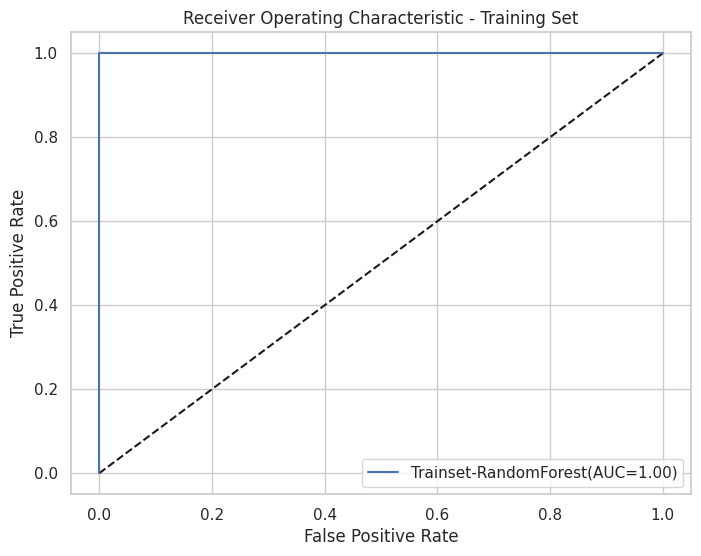


Model: RandomForest
Training Accuracy: 1.00
Training Specificity: 1.00
Training Sensitivity: 1.00
Training PPV: 1.00
Training NPV: 1.00
Training ROCAUC Score: 1.00


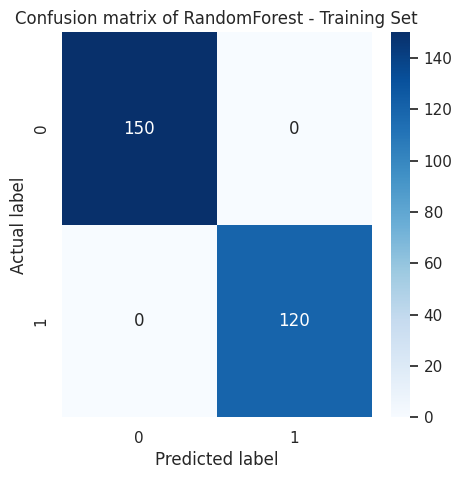

In [384]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')

# 학습데이터 진행
y_train_pred = grid.predict_proba(X_train_res)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_pred)
roc_auc_train = roc_auc_score(y_train_res, y_train_pred)
plt.plot(fpr_train, tpr_train, label=f'Trainset-{model_name}(AUC={roc_auc_train:.2f})')
plt.title(f'Trainset-{model_name} (AUC={roc_auc_train:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Training Set')
plt.legend(loc='lower right')
plt.show()

# 성능지표 및 confusion matrix 출력
y_train_pred_class = grid.predict(X_train_res)
y_train_pred_proba = grid.predict_proba(X_train_res)[:, 1]

cm_train = confusion_matrix(y_train_res, y_train_pred_class)
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train_res, y_train_pred_class).ravel()

print("\nModel: {}".format(model_name))
print("Training Accuracy: {:.2f}".format(accuracy_score(y_train_res, y_train_pred_class)))
print("Training Specificity: {:.2f}".format(tn_train / (tn_train + fp_train)))
print("Training Sensitivity: {:.2f}".format(tp_train / (tp_train + fn_train)))
print("Training PPV: {:.2f}".format(tp_train / (tp_train + fp_train)))
print("Training NPV: {:.2f}".format(tn_train / (tn_train + fn_train)))
print("Training ROCAUC Score: {:.2f}".format(roc_auc_score(y_train_res, y_train_pred_proba)))

plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion matrix of {} - Training Set'.format(model_name))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


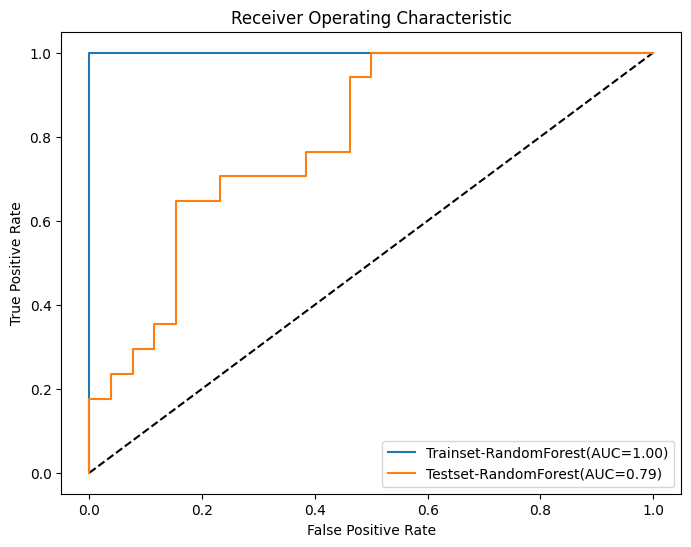


Model:RandomForest
Accuracy:0.77
Specificity:0.85
Sensitivity:0.65
PPV:0.73
NPV:0.79
ROCAUC Score:0.79


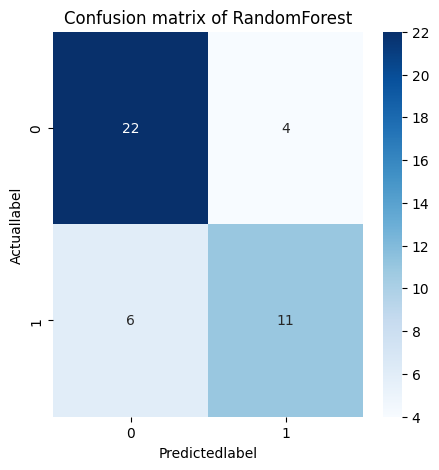

In [ ]:
#테스트셋 및 트레이닝셋에대한 ROC커브 출력

plt.figure(figsize=(8,6))
plt.plot([0,1],[0,1],'k--')

# 학습데이터 진행
y_train_pred=grid.predict_proba(X_train_res)[:,1]
fpr_train,tpr_train,_=roc_curve(y_train_res,y_train_pred)
roc_auc_train=roc_auc_score(y_train_res,y_train_pred)
plt.plot(fpr_train, tpr_train, label=f'Trainset-{model_name}(AUC={roc_auc_train:.2f})')
plt.title(f'Trainset-{model_name} (AUC={roc_auc_train:.2f})')

# TEST 진행
y_test_pred=grid.predict_proba(X_test_res)[:,1]
fpr_test,tpr_test,_=roc_curve(y_test_res,y_test_pred)
roc_auc_test=roc_auc_score(y_test_res,y_test_pred)

# 추론 시각화
plt.plot(fpr_test,tpr_test,label=f'Testset-{model_name}(AUC={roc_auc_test:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

#성능지표 및 confusionmatrix출력
y_test_pred=grid.predict(X_test_res)
y_test_pred_proba=grid.predict_proba(X_test_res)[:,1]

cm=confusion_matrix(y_test_res,y_test_pred)
tn, fp, fn, tp = confusion_matrix(y_test_res,y_test_pred).ravel()

print("\nModel:{}".format(model_name))
print("Accuracy:{:.2f}".format(accuracy_score(y_test_res,y_test_pred)))
print("Specificity:{:.2f}".format(tn / (tn + fp)))
print("Sensitivity:{:.2f}".format(tp / (tp + fn)))
print("PPV:{:.2f}".format(tp / (tp + fp)))
print("NPV:{:.2f}".format(tn / (tn + fn)))
print("ROCAUC Score:{:.2f}".format(roc_auc_score(y_test_res,y_test_pred_proba)))


plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt="d",cmap='Blues')

plt.title('Confusion matrix of {}'.format(model_name))
plt.ylabel('Actuallabel')
plt.xlabel('Predictedlabel')
plt.show()

### Save the model

In [385]:
import pickle

# Save the data to a pickle file
with open('best_model_for_model_150_59.pkl', 'wb') as file:
    pickle.dump(grid, file)

**Testing the saved model on training data (seen data)**

In [ ]:
X_test_res

,Age,Sex,Height,Weight,SBP,DBP,DM_dur,DM_insul,Smoke_Hx,TC,Glucose,HbA1c,eGFR,Cystatin_C,BMI_cal
9,56,2,164.5,66.0,168.0,89.0,10.0,0,0.0,183.0,144.0,7.5,99.6,0.86,24.39
47,56,2,147.7,54.7,156.0,73.0,19.0,1,0.0,144.0,118.0,6.9,44.7,1.47,25.07
66,50,2,156.0,50.2,128.0,70.0,10.0,0,0.0,135.0,104.0,6.1,103.9,0.51,20.63
41,65,1,166.9,59.6,107.0,58.0,3.0,1,0.5,116.0,96.0,9.2,83.7,0.81,21.40
117,51,2,155.8,63.2,133.0,86.0,9.0,1,0.0,119.0,139.0,9.2,104.7,0.69,26.04
111,71,2,161.3,55.2,134.0,74.0,7.0,0,0.0,209.0,141.0,6.5,91.0,0.60,21.22
15,57,1,170.2,91.0,142.0,88.0,18.0,1,0.0,104.0,111.0,6.7,96.3,0.67,31.41
86,50,1,180.6,84.6,153.0,95.0,2.0,0,0.5,136.0,119.0,5.5,104.7,0.66,25.94
75,59,1,174.3,63.1,150.0,73.0,22.0,0,1.0,179.0,148.0,7.3,97.3,0.77,20.77
144,64,2,150.8,60.3,142.0,83.0,8.0,0,0.0,123.0,110.0,6.2,90.3,0.81,26.52


In [ ]:
# validation_disease_sample = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iDMas DR V2/Validation/dataset/validation_snubh_january/DR_SNUBH_E2311_case_only_300.csv')

In [ ]:
# # Drop rows with NaN values
# validation_disease_sample.dropna(inplace=True)

In [ ]:
# # Randomly select 148 rows with all columns
# random_selection_disease_1 = validation_disease_sample.sample(n=239)
# random_selection_disease_2 = validation_disease_sample.sample(n=239)
# random_selection_disease_3 = validation_disease_sample.sample(n=239)


In [364]:
random_selection_disease_1.to_csv('validation_disease_set_1.csv')
random_selection_disease_2.to_csv('validation_disease_set_2.csv')
random_selection_disease_3.to_csv('validation_disease_set_3.csv')

In [362]:
val_1 = pd.concat([random_selection_1, random_selection_disease_1], ignore_index=True)
val_2 = pd.concat([random_selection_2, random_selection_disease_2], ignore_index=True)
val_3 = pd.concat([random_selection_3, random_selection_disease_3], ignore_index=True)

In [365]:
val_1.to_csv('validation_1.csv')
val_2.to_csv('validation_2.csv')
val_3.to_csv('validation_3.csv')

In [ ]:
val_3['Adjusted_diagnosis2'].value_counts()

1.0    239
0.0    148
Name: Adjusted_diagnosis2, dtype: int64

In [386]:
X_test = val_1[['Age', 'Sex', 'Height', 'Weight', 'SBP', 'DBP', 'DM_dur', 'DM_insul','Smoke_Hx','TC','Glucose', 'HbA1c', 'eGFR','Cystatin_C', 'BMI_cal']]
y_test = val_1[['Adjusted_diagnosis2']]

# Validation set 1

In [387]:
# Load the model from the pickle file
with open('best_model_for_model_150_59.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Use the loaded model to get predicted probabilities on the training data
y_test_pred_proba = loaded_model.predict_proba(X_test)[:, 1]
y_test_pred = loaded_model.predict(X_test)


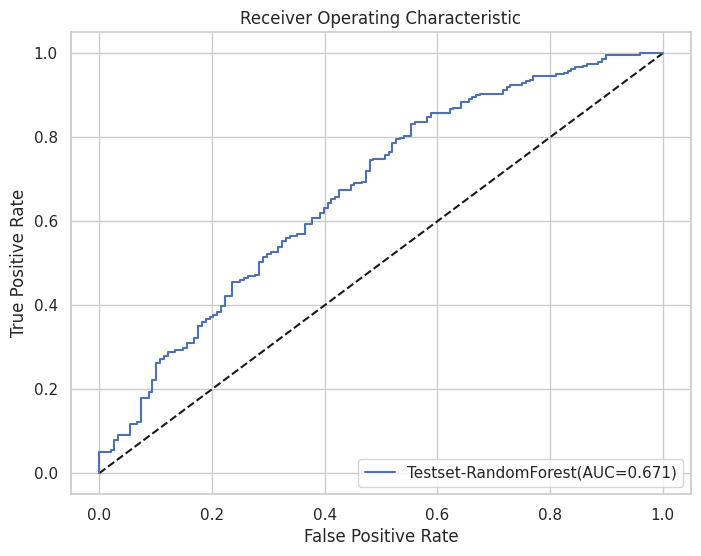

-------------------------------------------------------------------------------------
Testing Results

Model: RandomForest
Accuracy: 0.597
Specificity: 0.649
Sensitivity: 0.565
PPV: 0.722
NPV: 0.480
ROCAUC Score: 0.671


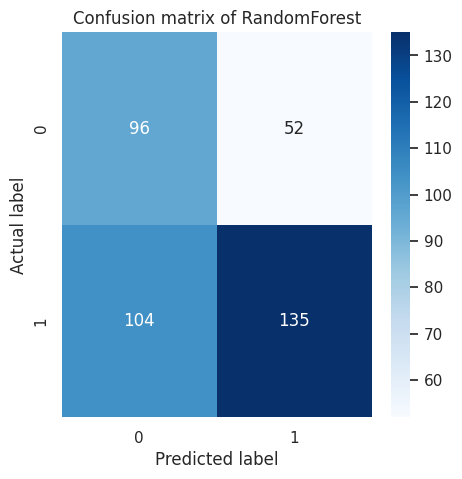

In [388]:
# with threshold : 0.5103

# Assuming loaded_model is defined or loaded before this point

model_name = 'RandomForest'
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')

# Testing ROC Curve
y_test_pred_proba = loaded_model.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)

# ROC Curve Visualization
plt.plot(fpr_test, tpr_test, label=f'Testset-{model_name}(AUC={roc_auc_test:.3f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Threshold for prediction
threshold = 0.5103
y_test_pred = (y_test_pred_proba >= threshold).astype(int)

print("-------------------------------------------------------------------------------------")
print("Testing Results")
# Performance metrics and confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print("\nModel: {}".format(model_name))
print("Accuracy: {:.3f}".format(accuracy_score(y_test, y_test_pred)))
print("Specificity: {:.3f}".format(tn / (tn + fp)))
print("Sensitivity: {:.3f}".format(tp / (tp + fn)))
print("PPV: {:.3f}".format(tp / (tp + fp)))
print("NPV: {:.3f}".format(tn / (tn + fn)))
print("ROCAUC Score: {:.3f}".format(roc_auc_score(y_test, y_test_pred_proba)))

# Confusion matrix visualization
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion matrix of {}'.format(model_name))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Validation set 2

In [ ]:
X_test = val_2[['Age', 'Sex', 'Height', 'Weight', 'SBP', 'DBP', 'DM_dur', 'DM_insul','Smoke_Hx','TC','Glucose', 'HbA1c', 'eGFR','Cystatin_C', 'BMI_cal']]
y_test = val_2[['Adjusted_diagnosis2']]

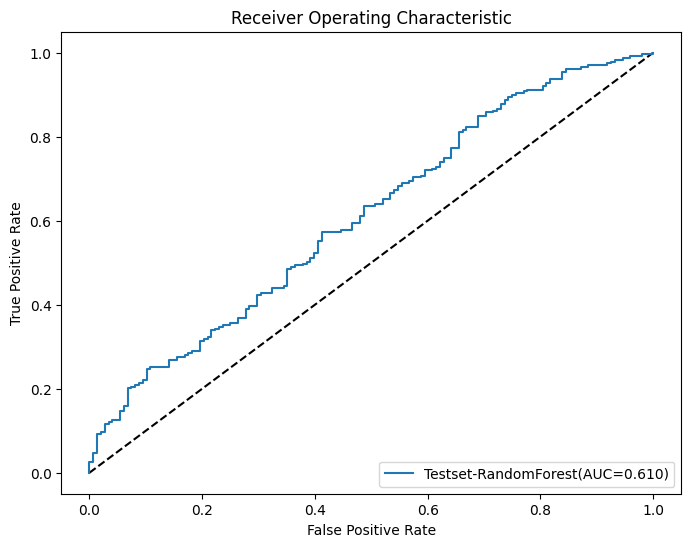

-------------------------------------------------------------------------------------
Testing Results

Model: RandomForest
Accuracy: 0.509
Specificity: 0.777
Sensitivity: 0.343
PPV: 0.713
NPV: 0.423
ROCAUC Score: 0.610


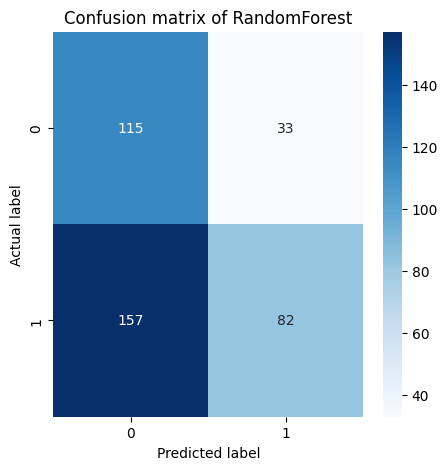

In [ ]:
# with threshold : 0.5103

# Assuming loaded_model is defined or loaded before this point

model_name = 'RandomForest'
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')

# Testing ROC Curve
y_test_pred_proba = loaded_model.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)

# ROC Curve Visualization
plt.plot(fpr_test, tpr_test, label=f'Testset-{model_name}(AUC={roc_auc_test:.3f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Threshold for prediction
threshold = 0.5103
y_test_pred = (y_test_pred_proba >= threshold).astype(int)

print("-------------------------------------------------------------------------------------")
print("Testing Results")
# Performance metrics and confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print("\nModel: {}".format(model_name))
print("Accuracy: {:.3f}".format(accuracy_score(y_test, y_test_pred)))
print("Specificity: {:.3f}".format(tn / (tn + fp)))
print("Sensitivity: {:.3f}".format(tp / (tp + fn)))
print("PPV: {:.3f}".format(tp / (tp + fp)))
print("NPV: {:.3f}".format(tn / (tn + fn)))
print("ROCAUC Score: {:.3f}".format(roc_auc_score(y_test, y_test_pred_proba)))

# Confusion matrix visualization
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion matrix of {}'.format(model_name))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Validation set 3

In [ ]:
X_test = val_3[['Age', 'Sex', 'Height', 'Weight', 'SBP', 'DBP', 'DM_dur', 'DM_insul','Smoke_Hx','TC','Glucose', 'HbA1c', 'eGFR','Cystatin_C', 'BMI_cal']]
y_test = val_3[['Adjusted_diagnosis2']]

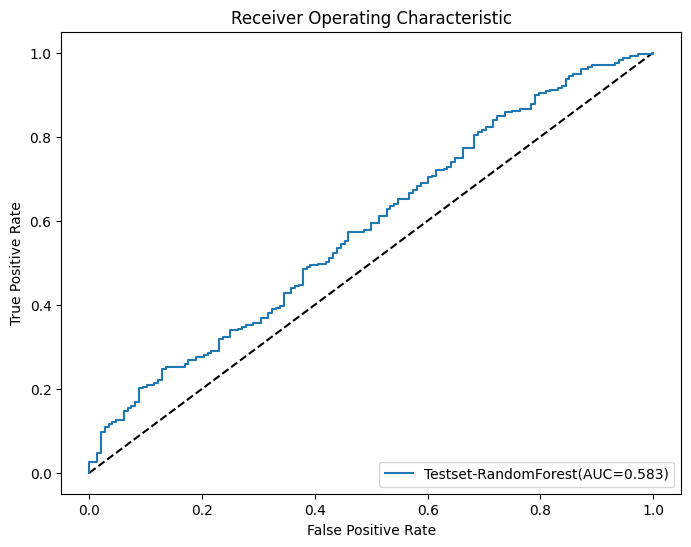

-------------------------------------------------------------------------------------
Testing Results

Model: RandomForest
Accuracy: 0.494
Specificity: 0.736
Sensitivity: 0.343
PPV: 0.678
NPV: 0.410
ROCAUC Score: 0.583


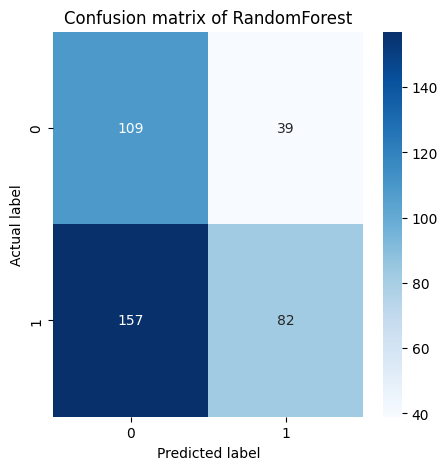

In [ ]:
# with threshold : 0.5103

# Assuming loaded_model is defined or loaded before this point

model_name = 'RandomForest'
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')

# Testing ROC Curve
y_test_pred_proba = loaded_model.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)

# ROC Curve Visualization
plt.plot(fpr_test, tpr_test, label=f'Testset-{model_name}(AUC={roc_auc_test:.3f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Threshold for prediction
threshold = 0.5103
y_test_pred = (y_test_pred_proba >= threshold).astype(int)

print("-------------------------------------------------------------------------------------")
print("Testing Results")
# Performance metrics and confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print("\nModel: {}".format(model_name))
print("Accuracy: {:.3f}".format(accuracy_score(y_test, y_test_pred)))
print("Specificity: {:.3f}".format(tn / (tn + fp)))
print("Sensitivity: {:.3f}".format(tp / (tp + fn)))
print("PPV: {:.3f}".format(tp / (tp + fp)))
print("NPV: {:.3f}".format(tn / (tn + fn)))
print("ROCAUC Score: {:.3f}".format(roc_auc_score(y_test, y_test_pred_proba)))

# Confusion matrix visualization
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion matrix of {}'.format(model_name))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()